In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

## Dataset Description
This dataset contains match-level information of IPL 2022, including details about teams, venue, toss decisions, innings scores, match results, and key player performances such as Player of the Match, top scorer, and best bowler. It is useful for analyzing team performance, toss impact, scoring patterns, and player contributions in IPL matches.

OExplanation of Important Columns (Top 10)

 1.match_id : Unique identifier assigned to each IPL match.

 2.venue : The stadium where the match was played.

 3.team1 : Team that batted or played first in the match.

 4.team2 : Team that batted or played second in the match.

 5.toss_winner : Team that won the toss before the match started.

 6.toss_decision : Decision taken by the toss winner to bat or field first.

 7.first_ings_score : Total runs scored by the team batting in the first innings.

 8.second_ings_score : Total runs scored by the team batting in the second innings.

 9.match_winner : Team that won the match.

 10.player_of_the_match : Player who delivered the most impactful performance in the match.

In [2]:
df = pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
df.shape

(74, 20)

In [5]:
print(f"your rows are {df.shape[0]} and your are coloumns {df.shape[1]}")

your rows are 74 and your are coloumns 20


In [6]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [7]:
match_winners = df["match_winner"].value_counts()
match_winners

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'most win team')

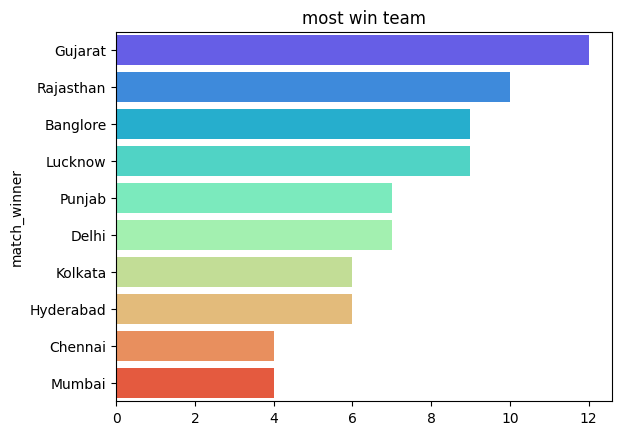

In [8]:
match_winners = df["match_winner"].value_counts()
sns.barplot(y = match_winners.index, x = match_winners.values, palette = "rainbow")
plt.title("most win team")

### insight from chart
Teams with higher match wins showed better consistency and strategic execution throughout the tournament.

Text(0.5, 1.0, 'Toss decision Trends')

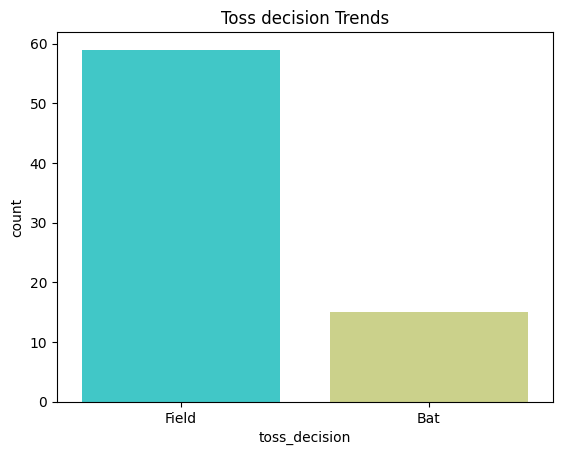

In [9]:
sns.countplot(x = df["toss_decision"], palette = "rainbow")
plt.title("Toss decision Trends")

### insight from chart
Most teams preferred to field first after winning the toss, highlighting the 
dominance of chasing strategy in IPL 2022.

In [10]:
count = df[df["toss_winner"] == df["match_winner"]]["match_id"].count()
percentage = (count * 100 / df.shape[0])
percentage.round(2)

np.float64(48.65)

### insight
Winning the toss increases the chances of winning the match, 
but overall team performance remains the most decisive factor.

In [11]:
#df.head()

<Axes: xlabel='won_by', ylabel='count'>

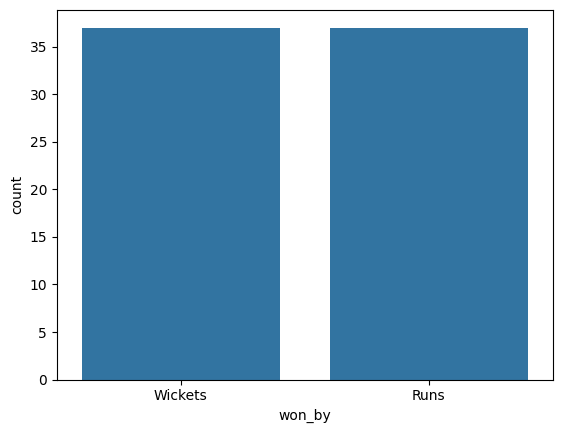

In [12]:
sns.countplot(x = df["won_by"])

### insight from chart
Most matches were won by wickets, highlighting the
dominance of chasing strategy in IPL 2022.

In [14]:
count = df["player_of_the_match"].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

<Axes: ylabel='player_of_the_match'>

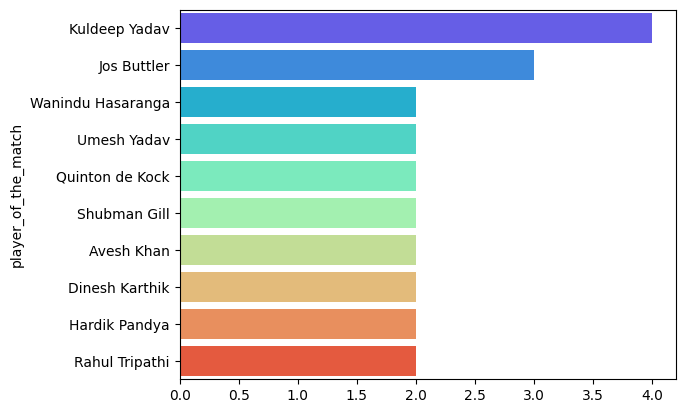

In [15]:
sns.barplot(x = count.values, y = count.index, palette = "rainbow")

### insight from chart
The chart shows that Kuldeep Yadav has won the most Player of the Match awards, followed by Jos Buttler.

<Axes: ylabel='top_scorer'>

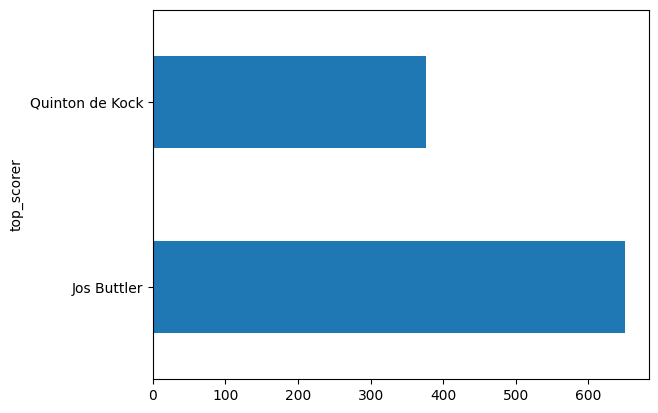

In [16]:
high = df.groupby("top_scorer")["highscore"].sum().sort_values(ascending = False).head(2)
high.plot(kind = "barh")

### insight from chart
The chart indicates that Jos Buttler is the highest run-scorer overall, while Quinton de Kock is the second highest scorer in the dataset.

<Axes: ylabel='best_bowling'>

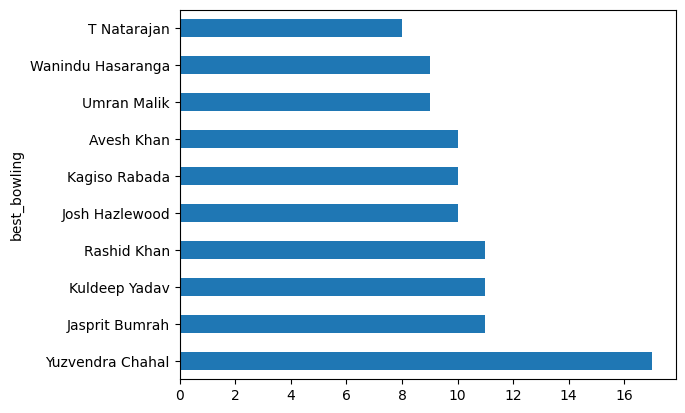

In [17]:
df["highest_wickets"] = df["best_bowling_figure"].apply(lambda x : x.split("--")[0])
df["highest_wickets"] = df["highest_wickets"].astype(int)
top_bowlers = df.groupby("best_bowling")['highest_wickets'].sum().sort_values(ascending = False).head(10)
top_bowlers.plot(kind = "barh")

### insight from chart
The chart shows that Yuzvendra Chahal has the highest total wickets among the top bowlers, followed by Jasprit Bumrah and Kuldeep Yadav, 
indicating their strong bowling impact.

# Venue Analysis

<Axes: ylabel='venue'>

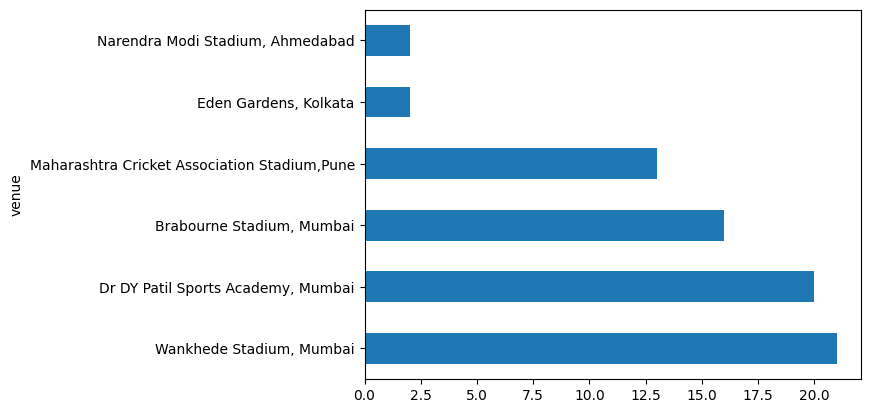

In [21]:
venue_count = df["venue"].value_counts()
venue_count.plot(kind = "barh")

### insight from chart
The chart shows that Wankhede Stadium, Mumbai hosted the highest number of matches, 
followed by Dr DY Patil Sports Academy and Brabourne Stadium.

### Who won the highest margin by runs ?

In [27]:
df[df["won_by"] == "Runs"].sort_values(by = "margin", ascending = False).head(1)[["match_winner", "margin"]]

,match_winner,margin
54,Chennai,91


### Which player had the highest individual score ?

In [37]:
df[df["highscore"] == df["highscore"].max()][["top_scorer", "highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


### Which bowler had the best bowling figuers

In [44]:
df[df["highest_wickets"] == df["highest_wickets"].max()][["best_bowling","best_bowling_figure" ]]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10


### Conclusion

This project successfully analyzed IPL 2022 match-level data to uncover meaningful patterns 
related to team performance, toss decisions, and match outcomes. Through exploratory data 
analysis and visualizations, several important insights were identified.

The analysis shows that winning the toss provides an advantage, especially when teams 
choose to field first, as most matches were won by wickets, highlighting the dominance 
of the chasing strategy in modern T20 cricket. However, the toss alone does 
not guarantee victory—overall team performance remains the most critical factor.

Team-wise analysis revealed that consistent teams converted more toss wins 
into match wins, reflecting better tactical decision-making and execution. 
Additionally, visual comparisons helped identify top-performing teams and 
understand how match results varied based on different conditions.

Overall, this project demonstrates how data analysis and visualization can be 
used to extract actionable insights from sports data. It serves as a strong 
beginner-friendly example of applying Python, Pandas, Matplotlib, and Seaborn 
to real-world datasets and can be extended further for predictive modeling and advanced analytics.